In [7]:

from albumentations import Compose,Resize,HorizontalFlip,VerticalFlip
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
from skimage.segmentation import mark_boundaries 
%matplotlib inline
import random 
import numpy as np
import torch
from sklearn.model_selection import ShuffleSplit
import torch.nn.functional as F

In [2]:
path2train = 'Data/training_set'

h,w = 128,192
transform_training = Compose([
    Resize(h,w),
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.5)])
transform_val = Resize(h,w)

fetaldata = FetalData(path2data=path2train,transform=transform_training)
print(f"number of training images {len(fetaldata)}")

number of training images 999


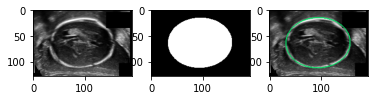

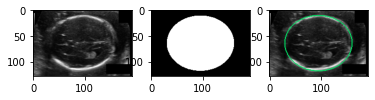

In [3]:
number_of_samples = 2
randlist = random.sample(range(0,len(fetaldata)),number_of_samples)
for item in randlist:
    image , annot = fetaldata[item]
    image,annot = np.array(to_pil_image(image)),np.array(to_pil_image(annot))
    plt.figure()
    plt.subplot(1, 3, 1) 
    plt.imshow(image,cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(annot,cmap='gray')
    plt.subplot(1,3,3)
    marked_image = mark_boundaries(image,annot,color=(0,0.9,0.4),mode='thick')
    plt.imshow(marked_image)

In [10]:
from pyexpat import model
from utils import parse_configuration
config = parse_configuration("config.json")
from models.SegModel import SegModel
from datasets import create_dataset, create_transformer

#train,val = create_dataset(**config["train_dataset_params"])
transformer = create_transformer(config['transformer_params'])
train,val = create_dataset(transformer,**config["train_dataset_params"])

torch.Size([1, 128, 128])
tensor(1.)


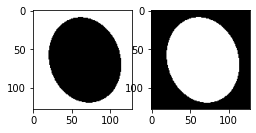

In [43]:
for image,annot in train:
    ann = annot[0]
    break
zeros = torch.zeros_like(ann)
zeros[ann==0] = 1
ones = torch.ones_like(ann)
ones[ann==1] =0
print(ones.shape)
plt.figure()
plt.subplot(1, 3, 1) 
plt.imshow(to_pil_image(ones),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(to_pil_image(ann),cmap='gray')

print(ann.max())
